In [4]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import sin, cos , exp , log, pi

#### The relation pertaining to the interpolation structure

$$ Q_n (x) = Q_{n-1} (x) + C_{n}{(x-x_{o})(x-x_{1})...(x-x_{n-1})} $$

$$ C_n = \frac{f(x_n) - Q_{n-1} (x_n) }{(x_n - x_0)..(x_n - x_{n-1}) }  $$  


Here $x_n$ is the collection or the array of interpolation points and $x$ is the array for actual values over which the polynomial has to be evaluated over. 


We do this via a recursive implementation

In [29]:
def fn(x): #the function for which we are interpolating the data points 
    #return exp(-x)
    return sin(x)
    #return 1/(1+ 10* x **2 )

In [5]:
n= 15
#the no ofpoints you want to interpolate on

##### For defining the x array and the interpolation points 

In [39]:
xt=np.linspace(-1,1,n) #array of interpolation points 
x=np.linspace(-1,1,100) #array of actual data points to be plotted

##### Recursive code for implementation

In [7]:
#The fucntions
def deno(xt,n):
    s=1
    for i in range(n):
        s*=xt[n]-xt[i]  #multiplies all the terms of (xn -x(i)) form with i 0 to n-1
    return s
def numo(x,xt,n):
    s=1
    for i in range(n): #multiplies all the terms of form (x -x(i)) form with i 0 to n-1
        s*=x-xt[i]
    return s
def rec_int(x,xt,n):   #recursive flow implementation
    if n==0:
        return fn(xt[n])
    else:
        return rec_int(x,xt,n-1) + ( (fn(xt[n]) -rec_int(xt[n],xt,n-1))/deno(xt,n) )* numo(x,xt,n)

In [8]:
y=rec_int(x,xt,n-1)

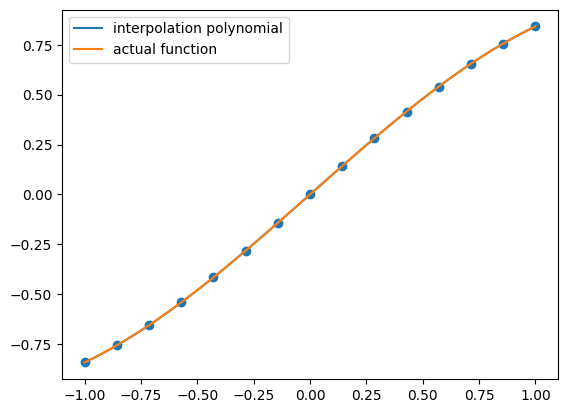

In [9]:
plt.plot(x,y,label="interpolation polynomial") # the interpolated y array wrt to x
plt.scatter(xt,fn(xt)) # the points
plt.plot(x,fn(x),label="actual function") #the real function
plt.legend()

### Chebyshev Interpolation

We take the interpolation points to be such that , there are the zeros of the Chebyshev polynomial
$$ x_j = cos(\frac{2j+1}{2n+2} \pi) $$
Where $ 0 < j < n $

In [10]:
xt1=np.zeros(n)
for i in range(n):
    xt1[i] = cos((2*i +1 )/(2*n+2) *pi)



In [11]:
yc=rec_int(x,xt1,n-1)

Text(0.5, 1.0, 'Newton Interpolation')

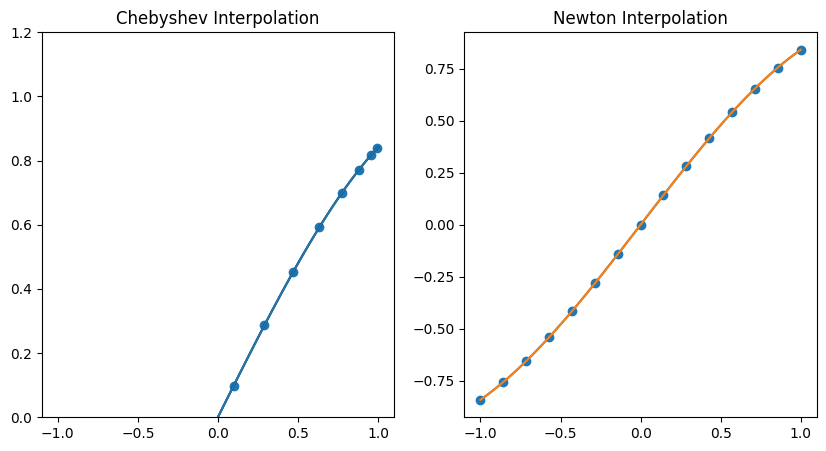

In [12]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)

#plt.plot(x,y)
plt.plot(x,yc,color="black")
plt.scatter(xt1,fn(xt1))
plt.plot(x,fn(x))
#plt.xlim(0,3.5) ; plt.ylim(-1,10)
plt.ylim(0,1.2)
plt.title("Chebyshev Interpolation")


plt.subplot(1,2,2)
plt.scatter(xt,fn(xt))
plt.plot(x,y)
plt.plot(x,fn(x))
plt.title("Newton Interpolation")

## Lagrange Interpolation

Given a function $f(x)$ sampled at $n+1$ points $x_0, x_1, ...., x_n$, Lagrange Interpolation formula generates a 
polynomial $Q_n(x)$ of degree less than or equal to $n$ using the formula

$$Q_n(x) = \sum_{j=0}^{n} f(x_j) \ l^n_j(x) $$

where $l^n_j(x)j$ are $n+1$ polynomials of degree $n$ given by

$$ l^n_j(x) = \frac{(x-x_0)(x-x_1)..(x-x_{j-1})(x-x_{j+1})..(x-x_n)}{(x_j-x_0)(x_j-x_1)..(x_j - x_{j-1})(x_j-x_{j+1})..(x_j-x_n)} \ \ \ 0\leq j \leq n $$

### Lagrange Interpolation

In [133]:
def deno(xt,n,i):
    s=1
    for j in range(0,n+1):
        if j==i:
            continue
        else:
             s*=(xt[i]-xt[j])  #multiplies all the terms of (xn -x(i)) form with i 0 to n-1
    return s


def numo(x,xt,n,i):
    s=1
    for j in range(0,n+1):
        if j==i:
            continue
        else:
            s*= (x-xt[j])

    return s

def lagrange_int(x,xt,n):
    s=0
    for i in range(0,n+1):
        #S+=   fn(xt[i]) * numo(x,xt,0,i) * numo(x,xt,i+1,n)/deno(xt,n,i)
        s+=   (fn(xt[i])*(numo(x,xt,n,i)/deno(xt,n,i)))


    return s
     


In [134]:
ym=lagrange_int(x,xt,n-1)

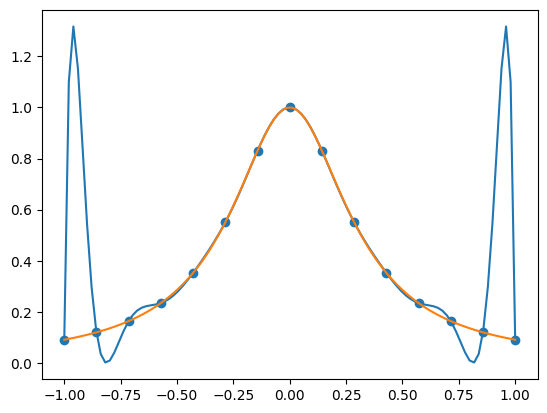

In [136]:
plt.plot(x,ym)
plt.scatter(xt,fn(xt))
plt.plot(x,fn(x))

### Mapping the Chebyshev zeros to a different domain

We map it according to the relation 
$$    X = X_0  + \frac{s}{2}(x - x_0)
$$

In [40]:
def mapfun(x,dlim,s):
     X= dlim  + s/2 * (x-(-1))
     x=np.linspace(dlim,dlim+ s, 1000)
     return X,x

In [41]:
X,x= mapfun(xt1,3,3)

In [42]:
yc=rec_int(x,X,n-1)

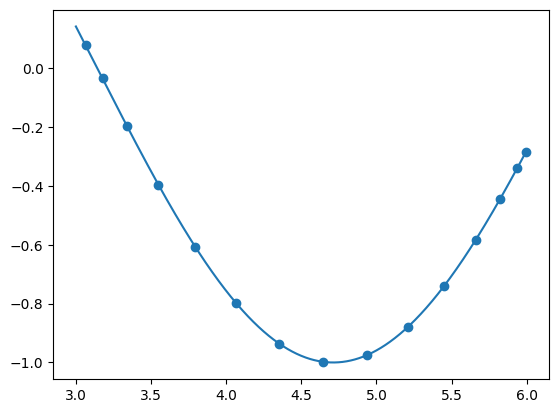

In [44]:
plt.plot(x,yc)
plt.scatter(X,fn(X))